## Root Finding (and Fixed Points)

There are many many examples from economics we seek to either find the root or the fixed point to a non-linear of (often many) equations, which cannot be computed analytically.

Many estimation algorithms for equilibrium problems involve a nested structure where there is some root-finding problem in the inner nest: BLP, dynamic discrete choice (rust, labor models), trade models, steady state of dynamic models.


*Defn:* Roots.
A function $g$ from $R^n$ to $R^n$ is given and one must find a vector $x$ that satisfies $x = g(x)$.

<img src="files/graph1.png" width="75%"/>


#### Examples

- Demand and Supply market clearing.
- FOCs from an optimization problem.


### Iterative Methods

We will consider methods that *systematically* look over the range of $x$ until $f(x) = 0$

### 1. Bisection Method

Intermediate Value Theorem: If a continuous real-valued function assumes two distinct values, then it must assume all values in between. 

If $f$ is continuous and $f(a)$ and $f(b)$ have different signs, then there must be at least one root $x$ in $[a,b]$.

Evaluate $f$ at the bisection of $a$ and $b$. Take the new interval to be the bisected interval with endpoints of different signs. Repeat. 

<img src="files/graph1.png" width="75%"/>

##### Bisection Example

In [56]:
# Set up packages
using Printf
# import Pkg
# Pkg.add("Plots")
using Plots

In [68]:
f(x) = 3 + 50*x.^3

f (generic function with 1 method)

In [69]:
a = -6.0;
b = 12.0;

In [70]:
tol = 1e-4;
s = sign(f(a)); # sign if the left boundary
x = (a+b)/2; # inital midpoint
d = (b-a)/2;
xsave=[];

In [71]:
while d>tol
    d=d/2; # length to cut the next interval
    push!(xsave, x)
    
    if s == sign(f(x))
        x = x+d;
    else
        x = x-d;
    end
end
push!(xsave,x)

@printf "Solution using user written code: x = %3.5f\n\n" x

@printf "Are we at a zero? f(x) = %3.5f" f(x)


Solution using user written code: x = -0.39155

Are we at a zero? f(x) = -0.00141

**Pros and cons of bisection**

* Pro: Guaranteed to find a root.
* Con: Slow (no gradient information).
* Con: Will only find one root.
* Con: Only good for single variable functions
* Con: Can be very slow b/c it does not use info on shape of function

### 2. Function iteration

* Supply a guess $x^0$
* Use the updating rule $x^{(t+1)} \leftarrow g(x^{(t)})$.
 
The starting guess must be close to the fixed point where $||g'(x*)||<1$


<br><br><br><br>
<img src="files/graph2.png" width="75%"/>
<br><br><br><br>


#### Example



In [74]:

function fncIteration(g::Function,x::Float64)

    d = 100.0
    tol = 1e-4
    
    while d>tol
    
        d = abs(x-g(x))
        x = g(x)
    
    end

    return x
end



fncIteration (generic function with 1 method)

In [75]:
h(x) = x.^0.5;
x = 0.1

sol = fncIteration(h,x)

@printf "Solution using user written code: x = %3.5f" sol

Solution using user written code: x = 0.99993

### 3. Newton's Method

* Use derivative information
* Probably most common method.
* Sometimes we know the derivative (pen a paper).
* Sometimes we need to approximate the derivative.
* Same thing goes with second derivatives. 

*The idea:*

1. guess a point
2. linearize the function around that point 
3. find the root of the linear function using taylor expansion
4. use that point as your new guess and repeat



<br><br><br><br>
<img src="files/graph3.png" width="75%"/>
<br><br><br><br>




First-order Taylor approximation: $f(x)\approx f(x^t) + f'(x^t)(x - x^t) = 0$

which yields the following iteration rule: $x^{t+1}\leftarrow x^t - [f'(x^t)]^{-1}f(x^t)$

* *What do you notice about this iterative method?*
* We need to know the derivative!
* We will discuss this in detail later.


*Convergence*: Judd Theorem 2.1 (page 130) -- If $x^1$ is "sufficiently" close
to $x^*$, $f'(x^*)\ne0$ and $\mid \frac{f''(x^*)}{f'(x^*)}<\infty$, then the Newton
sequence will converge to $x^*$. Also, $f$ needs to be "smooth."

* Warning: if $f'(x^t)$ is close to zero, then it can overshoot and cause problems



#### Newton Example

Simple demand function in a separate file:


In [76]:
# Demand
q(p) = -12.0 + 2.0 .*p.^(-3.0);

# 1st derivative of demand
Dq(p) = -6.0 .*p.^(-4.0);


In [77]:
function nm(f::Function, fp::Function, x::Float64; tol=0.0000001)
   
    ctr=0;max_steps=100;
     
    while (abs(f(x)) > tol) && ctr < max_steps
        x = x - f(x) / fp(x)
        ctr = ctr + 1
    end

    ctr >= max_steps ? error("Method did not converge") : return x
    
end



nm (generic function with 1 method)

In [79]:
sol_nm = nm(q,Dq,0.1)

@printf "Solution using user written code: p = %3.5f" sol_nm

Solution using user written code: p = 0.55032

What happens if we pick a weird starting value?

Let's visualize the function first. 

In [49]:
xvals = 0.3:0.01:0.70
yvals = zero(similar(xvals));
yvals = [q(xvals[i]) for i=1:length(xvals)]

41-element Array{Float64,1}:
 62.074074074074076
 55.13436944043504
 49.03515624999999
 43.652948214931676
 38.885406065540394
 34.64723032069972
 30.866941015089168
 27.484334590251322
 24.44846187490888
 21.716010047370993
 19.249999999999996
 17.01873159124215
 14.99492495410863
  ⋮
 -2.26190603713135
 -2.7407407407407405
 -3.188689802230142
 -3.6082038199456203
 -4.001503717301148
 -4.370605468750001
 -4.717341829767866
 -5.0433814731335405
 -5.3502458746587855
 -5.639324241807451
 -5.911886736740849
 -6.169096209912535

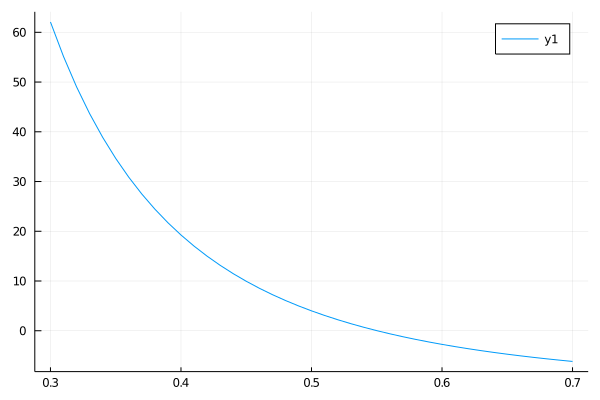

In [50]:
plot(xvals,yvals)

In [51]:
sol_nm = nm(q,Dq,0.001)

0.5503212079767968

In [52]:
sol_nm = nm(q,Dq,0.0)

NaN

For my simple program, it just exits with a "NaN." But in a canned package, it might appear that the solver finished, so always check the full output. 


### Quasi-Newton Methods

Many times we do not have an analytical derivative:

* It is difficult to compute analytically.
* Potentially make mistakes in coding.
* In general humans make mistakes.

Quasi-Newton methods are the same as the Newton method, except with an approximation of the jacobian.


#### Secant Method

Univariate Newton method with Jacobian approximation.

Replace $f'$ with an approximation from the last two function values:

$f'(x^t) \approx \frac{f(x^t) - f(x^{t-1})}{x^t - x^{t-1}}$

which yields the following update rule:

$x^{t+1} \leftarrow x^t - \frac{ x^t - x^{t-1} }{ f(x^t) - f(x^{t-1}) } f(x^t)$

You are constructing the approximating line through the two points $(x^t,f(x^t))$ and $(x^{t-1},f(x^{t-1}))$.


<br><br><br><br><br> 

[GRAPH]

<br><br><br><br><br>



#### Broyden's Method

Multivariate version of the secant method. 

* Generate a sequence of vectors $x^t$ and matrices $A^t$
* These approximate the root and Jacobian of $f$
* Guess $x^0$ and $A^0$.
* $A^0$ is often set to the numerical jacobian at x^0.

$f(x) \approx f(x^t) + A^t(x-x^t) = 0$ 
which yields the following rule
$x^{t+1} \leftarrow x^t - (A^t)^{-1}f(x^t)$



The Jacobian is also updated iteratively: 
$A^{t+1} \leftarrow A^t + [f(x^{t+1}) - f(x^t) - A^td^t]\frac{d^t}{d^td^t}$
where $d^t = x^{t+1} - x^t$

In practice we will update the inverse of the Jacboian to save an inversion step. 

**NOTE:** The sequence of approximations of the Jacobian DO NOT neccessarily  converge to the true Jacobian. 


This method will work if you start sufficiently close, and $f$ is well behaved...duh!
 
In practice, I have used this method and it has worked very well for problems where the Jacobian diagonally dominant. 


### Elementary Methods


* Let's day we have a system of $N$ non-linear equations and $N$ unknowns. 
* $f_1(x_1,...,x_n) = 0$
* **Also**,order the $x$'s so that the $x$ that "affects" $f_i$ the most is in the "correct" position.
* Ex. $\frac{\partial f_2}{\partial x_2}>\frac{\partial f_2}{\partial x_k}\,\,\, \forall k\ne2$

* Also, consider that the Jacobian is nightmare to compute for the entire system. 
    - Hard to derive analytically
    - Costly to compute
- **But**, $f_i(x_i;x_{i'})$ is not hard to compute.

#### Main Idea
* Go through system of equations, one equaiton at a time. 
* Solve each equation for the "dominant" unknown, *conditional* on the other unknowns. 

#### Gauss Jacobi 

```
    while not converged
  
      for i=1:N
        solve f_i(x_1...,x_N)=0 for x_i only
        
        (actually, no need to solve f_i exactly!!)
        
        save updated x_i but do not use
        
      end
      
      update x vector with new guesses
      
      convergence: x^new == x^old
      
    end    
```

#### Gauss Seidel

```
    while not converged
  
      for i=1:N
        solve f_i(x_1...,x_N)=0 for x_i only
        
        (actually, no need to solve f_i exactly!!)
        
        update x_i
        
      end
      
      convergence: x^new == x^old
      
    end
```

#### Discussion

* This obviously depends on ordering.
* Not guaranteed to work.
* Jacobi or Seidel might work better.
* For best results, the Jacobian needs to be "diagonally dominant"
* Good to combine with other methods
    - First GJ, switch to Newton (if possible)
* Can use Newton/Bisection/etc at inner step
